In [155]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import metrics

In [3]:
class attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [6]:
dataset = pd.read_csv("transitions.csv")

In [11]:
transitions = dataset["transition"].values

In [184]:
vocab = {}
vocab_index = 0
for transition in transitions:
    patterns = [f"X{v}X" for v in transition.split("X") if v != ""]
    for pattern in patterns:
        if pattern not in list(vocab.keys()):
            vocab[pattern] = vocab_index
            vocab_index += 1

In [185]:
vocab

{'XZX': 0,
 'XZAZASAX': 1,
 'XAX': 2,
 'XSX': 3,
 'XASAX': 4,
 'XSAZAZX': 5,
 'XSAZX': 6,
 'XZAX': 7,
 'XASX': 8,
 'XSAX': 9,
 'XSZX': 10,
 'XASZX': 11,
 'XAZAX': 12,
 'XAZSX': 13,
 'XSASX': 14,
 'XZSX': 15,
 'XAZX': 16,
 'XZSZSX': 17,
 'XSZSAX': 18,
 'XSZSX': 19,
 'XZASX': 20,
 'XAZASAX': 21,
 'XAZASAZX': 22,
 'XSASASX': 23,
 'XZSAX': 24,
 'XASZAZAZAZSZAZX': 25,
 'XZAZAX': 26,
 'XZAZSAZAX': 27,
 'XAZSZAZAX': 28,
 'XZSZX': 29,
 'XSZAX': 30,
 'XASZASZX': 31,
 'XASAZSZSAZSX': 32,
 'XSZAZSAZAZASZX': 33,
 'XASASX': 34,
 'XASASASX': 35,
 'XASZAX': 36,
 'XAZSZX': 37,
 'XASZSX': 38,
 'XZASAX': 39,
 'XASZAZX': 40,
 'XASAZX': 41,
 'XSZSZAZSZAZSZAZASX': 42,
 'XZSAZSX': 43,
 'XSASASAX': 44,
 'XSASAZX': 45,
 'XZSASX': 46,
 'XSAZSX': 47,
 'XASAZSASX': 48,
 'XSASAX': 49,
 'XZASZAZX': 50,
 'XZAZSZAX': 51,
 'XSZAZX': 52,
 'XZAZX': 53,
 'XSAZSZSX': 54,
 'XAZAZSZSX': 55,
 'XASZSAZAX': 56,
 'XSAZAX': 57,
 'XAZASX': 58,
 'XZAZSX': 59,
 'XASZAZASAX': 60,
 'XAZAZX': 61,
 'XZASASX': 62,
 'XSZASZASASX': 63,
 

In [169]:
vocab_length = len(vocab)
EMB_DIM = 128
MAX_LEN = 100

In [170]:
X = []
for transition in transitions:
    X.append([vocab.index(t) for t in transition])
    print(len(transition))

95
107
76
104
81
83
81
45
79
86
65
72
97
78
152
102
94
107
109
103
71
63
131
87
107
120
68
114
76
88
100
45
71
92
61
100
84
101
88
142
98
95
98
103
99
48
67
125
64
70


In [171]:
Y = dataset["rating"].values

In [172]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)

In [173]:
X.shape

(50, 100)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)

In [134]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25, 200), (25, 200), (25,), (25,))

In [135]:
sum(y_test)/len(y_test)

0.44

In [140]:
def create_model():
    model = Sequential()
    model.add(Embedding(vocab_length, EMB_DIM, input_length=MAX_LEN))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(attention(return_sequences=True)) # receive 3D and output 3D
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=["accuracy"], optimizer='adam')
#     model.summary()
    return model

In [137]:
history = model.fit(X_train, y_train, batch_size=4, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
7/7 [==============================] - 7s 322ms/step - loss: 0.6946 - accuracy: 0.4000 - val_loss: 0.6930 - val_accuracy: 0.5600
Epoch 2/300
7/7 [==============================] - 1s 130ms/step - loss: 0.6935 - accuracy: 0.4000 - val_loss: 0.6932 - val_accuracy: 0.4400
Epoch 3/300
7/7 [==============================] - 1s 132ms/step - loss: 0.6932 - accuracy: 0.6000 - val_loss: 0.6943 - val_accuracy: 0.4400
Epoch 4/300
7/7 [==============================] - 1s 137ms/step - loss: 0.6920 - accuracy: 0.5600 - val_loss: 0.6945 - val_accuracy: 0.4400
Epoch 5/300
7/7 [==============================] - 1s 130ms/step - loss: 0.6918 - accuracy: 0.5600 - val_loss: 0.6954 - val_accuracy: 0.4400
Epoch 6/300
7/7 [==============================] - 1s 131ms/step - loss: 0.6908 - accuracy: 0.5600 - val_loss: 0.6959 - val_accuracy: 0.4400
Epoch 7/300
7/7 [==============================] - 1s 138ms/step - loss: 0.6904 - accuracy: 0.5600 - val_loss: 0.6962 - val_accuracy: 0.4400
Epoch 8/300
7

Epoch 59/300
7/7 [==============================] - 1s 122ms/step - loss: 0.6140 - accuracy: 0.6400 - val_loss: 0.6462 - val_accuracy: 0.6400
Epoch 60/300
7/7 [==============================] - 1s 135ms/step - loss: 0.5711 - accuracy: 0.6800 - val_loss: 0.6743 - val_accuracy: 0.6000
Epoch 61/300
7/7 [==============================] - 1s 131ms/step - loss: 0.5465 - accuracy: 0.7200 - val_loss: 0.6753 - val_accuracy: 0.6800
Epoch 62/300
7/7 [==============================] - 1s 137ms/step - loss: 0.5058 - accuracy: 0.7200 - val_loss: 0.6712 - val_accuracy: 0.6800
Epoch 63/300
7/7 [==============================] - 1s 144ms/step - loss: 0.4749 - accuracy: 0.7600 - val_loss: 0.6825 - val_accuracy: 0.6800
Epoch 64/300
7/7 [==============================] - 1s 154ms/step - loss: 0.4513 - accuracy: 0.8400 - val_loss: 0.7051 - val_accuracy: 0.6400
Epoch 65/300
7/7 [==============================] - 1s 148ms/step - loss: 0.4472 - accuracy: 0.7600 - val_loss: 0.7420 - val_accuracy: 0.6800
Epoch 

7/7 [==============================] - 1s 141ms/step - loss: 0.6949 - accuracy: 0.6000 - val_loss: 0.7239 - val_accuracy: 0.4400
Epoch 117/300
7/7 [==============================] - 1s 135ms/step - loss: 0.6823 - accuracy: 0.5600 - val_loss: 0.7242 - val_accuracy: 0.4400
Epoch 118/300
7/7 [==============================] - 1s 132ms/step - loss: 0.6961 - accuracy: 0.5600 - val_loss: 0.7224 - val_accuracy: 0.4400
Epoch 119/300
7/7 [==============================] - 1s 135ms/step - loss: 0.6879 - accuracy: 0.5600 - val_loss: 0.7221 - val_accuracy: 0.4400
Epoch 120/300
7/7 [==============================] - 1s 130ms/step - loss: 0.6927 - accuracy: 0.5600 - val_loss: 0.7216 - val_accuracy: 0.4400
Epoch 121/300
7/7 [==============================] - 1s 133ms/step - loss: 0.6807 - accuracy: 0.5600 - val_loss: 0.7209 - val_accuracy: 0.4400
Epoch 122/300
7/7 [==============================] - 1s 133ms/step - loss: 0.6897 - accuracy: 0.5600 - val_loss: 0.7207 - val_accuracy: 0.4400
Epoch 123/300

KeyboardInterrupt: 

(1, 200)

In [122]:
y_pred = model.predict(X_test)

In [123]:
y_pred

array([[0.50923234],
       [0.83850694],
       [0.83961505],
       [0.6109468 ],
       [0.9248577 ],
       [0.5939322 ],
       [0.49883142],
       [0.5919971 ],
       [0.775409  ],
       [0.6002757 ],
       [0.60508245],
       [0.6357205 ],
       [0.8268899 ],
       [0.5937552 ],
       [0.7152885 ],
       [0.5984799 ],
       [0.76835275],
       [0.6924806 ],
       [0.5470392 ],
       [0.7554635 ],
       [0.5042605 ],
       [0.565993  ],
       [0.67992556],
       [0.7744668 ],
       [0.58483505]], dtype=float32)

KeyError: 'val_accuracy'

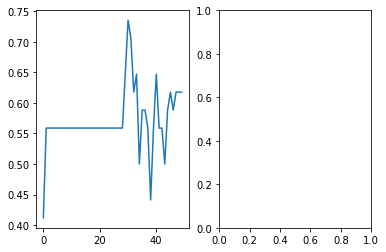

In [145]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 2)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')

plt.legend(['train', 'val'], loc='best')


In [176]:
# Kfold
# Define the K-fold Cross Validator
num_folds = 4
print(f"Performing K-fold Cross validation with K = {num_folds}")
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
f1_per_fold = []
history_per_fold = []
for train, test in kfold.split(X, Y):
      # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    model = create_model()
    history = model.fit(X[train], Y[train], batch_size=4, epochs=50)
    
    val_pred = model.predict(X[test])
    f1s = []
    max_thresh, max_f1 = 0, 0
    for thresh in np.arange(0.1, 0.9, 0.01):
        f1s.append(metrics.f1_score(Y[test], (val_pred>thresh)))
    max_f1 = np.max(f1s)
    max_thresh = np.arange(0.1, 0.9, 0.01)[np.argmax(f1s)]
    print('Validation set: Max F1-Score: %.2f - reached with threshold: %.2f' % (max_f1, max_thresh))
    f1_per_fold.append(max_f1)
    print(classification_report(Y[test], (val_pred>0.5)))
    
    # Generate generalization metrics
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    history_per_fold.append(history)
    # Increase fold number
    fold_no = fold_no + 1

Performing K-fold Cross validation with K = 4
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
10/10 [==============================] - 5s 61ms/step - loss: 0.6944 - accuracy: 0.5135
Epoch 2/50
10/10 [==============================] - 1s 62ms/step - loss: 0.6934 - accuracy: 0.4865
Epoch 3/50
10/10 [==============================] - 1s 62ms/step - loss: 0.6935 - accuracy: 0.5135
Epoch 4/50
10/10 [==============================] - 1s 61ms/step - loss: 0.6931 - accuracy: 0.5135
Epoch 5/50
10/10 [==============================] - 1s 63ms/step - loss: 0.6929 - accuracy: 0.5135
Epoch 6/50
10/10 [==============================] - 1s 62ms/step - loss: 0.6935 - accuracy: 0.5135
Epoch 7/50
10/10 [==============================] - 1s 64ms/step - loss: 0.6928 - accuracy: 0.5135
Epoch 8/50
10/10 [==============================] - 1s 60ms/step - loss: 0.6919 - accuracy: 0.5135
Epoch 9/50
10/10 [==============================] - 1s 65ms/step 

10/10 [==============================] - 1s 65ms/step - loss: 0.6353 - accuracy: 0.6486
Epoch 26/50
10/10 [==============================] - 1s 64ms/step - loss: 0.6026 - accuracy: 0.6757
Epoch 27/50
10/10 [==============================] - 1s 63ms/step - loss: 0.5941 - accuracy: 0.6486
Epoch 28/50
10/10 [==============================] - 1s 65ms/step - loss: 0.5915 - accuracy: 0.6216
Epoch 29/50
10/10 [==============================] - 1s 65ms/step - loss: 0.6026 - accuracy: 0.7027
Epoch 30/50
10/10 [==============================] - 1s 69ms/step - loss: 0.5784 - accuracy: 0.6757
Epoch 31/50
10/10 [==============================] - 1s 69ms/step - loss: 0.7592 - accuracy: 0.6486
Epoch 32/50
10/10 [==============================] - 1s 65ms/step - loss: 0.6353 - accuracy: 0.6757
Epoch 33/50
10/10 [==============================] - 1s 66ms/step - loss: 0.6167 - accuracy: 0.6216
Epoch 34/50
10/10 [==============================] - 1s 67ms/step - loss: 0.6574 - accuracy: 0.5946
Epoch 35/50


10/10 [==============================] - 1s 65ms/step - loss: 0.3650 - accuracy: 0.8684
Validation set: Max F1-Score: 0.78 - reached with threshold: 0.10
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.50      0.57      0.53         7

    accuracy                           0.42        12
   macro avg       0.38      0.39      0.38        12
weighted avg       0.40      0.42      0.40        12

Score for fold 3: loss of 0.9290766716003418; accuracy of 41.66666567325592%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/50
10/10 [==============================] - 6s 66ms/step - loss: 0.6933 - accuracy: 0.4474
Epoch 2/50
10/10 [==============================] - 1s 63ms/step - loss: 0.6920 - accuracy: 0.5526
Epoch 3/50
10/10 [==============================] - 1s 69ms/step - loss: 0.6919 - accuracy: 0.5526 0s - loss: 0.6856 - accu
Epoch 4/50
10/10 [=====

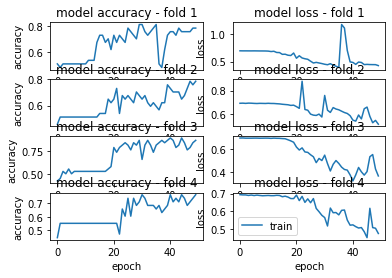

In [177]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = num_folds, ncols = 2)

for i in range(num_folds):
    ax[i][0].plot(history_per_fold[i].history['accuracy'])
#     ax[i][0].plot(history.history['val_acc'])
    ax[i][0].set_title(f'model accuracy - fold {i + 1}')
    ax[i][0].set_ylabel('accuracy')
    ax[i][0].set_xlabel('epoch')

    ax[i][1].plot(history_per_fold[i].history['loss'])
#     ax[i][1].plot(history.history[f'val_loss - fold {i + 1}'])
    ax[i][1].set_title(f'model loss - fold {i + 1}')
    ax[i][1].set_ylabel('loss')
    ax[i][1].set_xlabel('epoch')

plt.legend(['train', 'val'], loc='best')


In [178]:
f1_per_fold

[0.631578947368421, 0.8235294117647058, 0.7777777777777778, 0.5]

In [125]:
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets